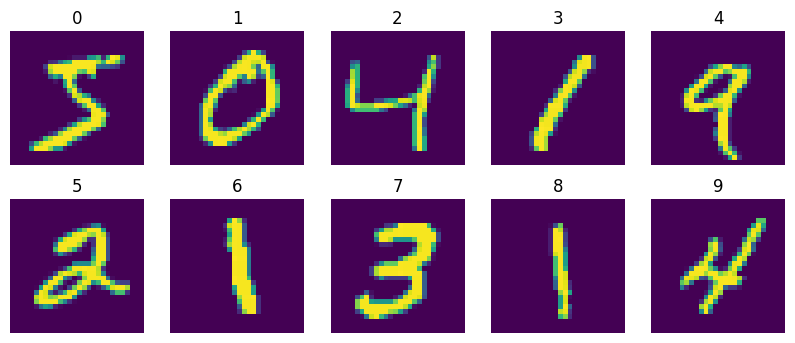

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
#mnist = tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist_train = np.loadtxt('mnist_train.csv',delimiter =',')
y_train = mnist_train[:,0]
X_train = np.reshape(mnist_train[:,1:],(60000,28,28))
mnist_test = np.loadtxt('mnist_test.csv',delimiter =',')
y_test = mnist_test[:,0]
X_test = np.reshape(mnist_test[:,1:],(10000,28,28))

X_train = X_train.astype(np.float32) / 255.0
x_test = X_test.astype(np.float32) / 255.0

#one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 시각화
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(i)
plt.show()


In [3]:
# 이전 세션 클리어
tf.keras.backend.clear_session()

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=10,
                                #activation=tf.nn.softmax,
                                kernel_initializer='he_uniform'))
model.summary()
# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.01)
# 손실 함수 정의
ce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
def loss_fn(Y, out):
    loss = ce(Y, out)
    return loss
# 정확도 함수 정의
def accuracy_fn(Y, out):
    pred = tf.argmax(out, 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400,906
Trainable params: 400,906
Non-trai

In [5]:
import time
# 훈련 스텝 정의
#@tf.function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        out = model(X, training=True)
        loss = loss_fn(Y, out)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

# 데이터셋 준비
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128)
fstr = "Iter: {:5}, Loss: {:5.4f}, Accuracy: {:5.4f}"

# 훈련 루프
t = time.time()
for step in range(10):
    for x, y in dataset:
        loss = train_step(x, y)
    print(fstr.format(
        step,
        loss_fn(y_train, model(X_train)),
        accuracy_fn(y_train, model(X_train))))
elapsed = time.time() - t
print('Training Time:', elapsed)
print("Test accuracy: {:5.4f}".format(accuracy_fn(y_test, model(X_test))))


Iter:     0, Loss: 0.1982, Accuracy: 0.9453
Iter:     1, Loss: 0.1579, Accuracy: 0.9565
Iter:     2, Loss: 0.1198, Accuracy: 0.9678
Iter:     3, Loss: 0.1354, Accuracy: 0.9621
Iter:     4, Loss: 0.1103, Accuracy: 0.9742
Iter:     5, Loss: 0.2384, Accuracy: 0.9610
Iter:     6, Loss: 0.1193, Accuracy: 0.9731
Iter:     7, Loss: 0.0871, Accuracy: 0.9790
Iter:     8, Loss: 0.0840, Accuracy: 0.9796
Iter:     9, Loss: 0.0727, Accuracy: 0.9814
Training Time: 35.5180344581604
Test accuracy: 0.9654


In [6]:
# 훈련 스텝 정의
@tf.function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        out = model(X, training=True)
        loss = loss_fn(Y, out)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

# 데이터셋 준비
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128)
fstr = "Iter: {:5}, Loss: {:5.4f}, Accuracy: {:5.4f}"

# 훈련 루프
t = time.time()
for step in range(10):
    for x, y in dataset:
        loss = train_step(x, y)
    print(fstr.format(
        step,
        loss_fn(y_train, model(X_train)),
        accuracy_fn(y_train, model(X_train))))
elapsed = time.time() - t
print('Training Time:', elapsed)
print("Test accuracy: {:5.4f}".format(accuracy_fn(y_test, model(X_test))))


Iter:     0, Loss: 0.1299, Accuracy: 0.9750
Iter:     1, Loss: 0.0825, Accuracy: 0.9786
Iter:     2, Loss: 0.0635, Accuracy: 0.9837
Iter:     3, Loss: 0.1020, Accuracy: 0.9750
Iter:     4, Loss: 0.0798, Accuracy: 0.9796
Iter:     5, Loss: 0.0714, Accuracy: 0.9830
Iter:     6, Loss: 0.0802, Accuracy: 0.9848
Iter:     7, Loss: 0.0850, Accuracy: 0.9807
Iter:     8, Loss: 0.0624, Accuracy: 0.9850
Iter:     9, Loss: 0.0529, Accuracy: 0.9873
Training Time: 7.975446701049805
Test accuracy: 0.9683


In [7]:
tf.keras.backend.clear_session()
# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, kernel_initializer='he_uniform'))
model.summary()

# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = optimizer, metrics = [tf.keras.metrics.CategoricalAccuracy()])

model.fit(X_train,y_train,epochs = 10)

m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(model.predict(X_test), y_test)
print("Test accuracy: {:5.4f}".format(m.result().numpy()))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400,906
Trainable params: 400,906
Non-trai

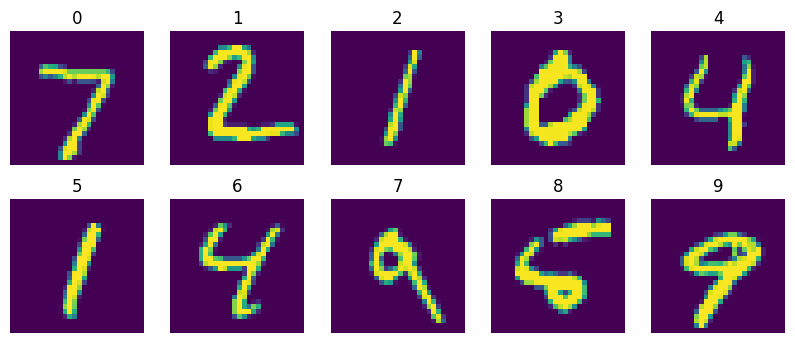

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [7 2 1 0 4 1 4 9 5 9]
1/1 [==============================] - 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [7 2 1 0 4 1 4 9 5 9]


In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(i)
plt.show()

print(y_test[0:10], np.argmax(y_test[0:10], axis=1))

y_pred = model.predict(X_test[0:10,:,:])
print(y_pred[0:10], np.argmax(y_pred, axis=1))


In [8]:
# 설정 및 학습 코드는 앞 쪽의 MNIST 예제 코드 사용

# 모델 정의 
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, kernel_initializer='he_uniform'))
model.summary()

# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = optimizer, metrics = [tf.keras.metrics.CategoricalAccuracy()])

model.fit(X_train,y_train,epochs = 10)

m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(model.predict(X_test), y_test)
print("Test accuracy: {:5.4f}".format(m.result().numpy()))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2

In [17]:
# 설정 및 학습 코드는 앞 쪽의 MNIST 예제 코드 사용
# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, use_bias = False, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=256, use_bias = False, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=256, use_bias = False, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10, use_bias = False, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.sigmoid))

# tanh 256->tanh 256-> ReLU 256-> ReLU 256 
model.summary()

# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.01)
#loss_fn = tf.keras.metrics.CategoricalAccuracy(logits = True)
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = optimizer, metrics = [tf.keras.metrics.CategoricalAccuracy()])

model.fit(X_train,y_train,epochs = 10)

m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_test, model.predict(X_test))
print("Test accuracy: {:5.4f}".format(m.result().numpy()))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200704    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65536     
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      